# 0. Import Required Libraries

In [151]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

# 1. Load the data

In [152]:
# LOAD the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Prepare the data

In [153]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
# One hot encoding for the labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test : ",x_test.shape)
print("y_test : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000, 10)
x_test :  (10000, 28, 28, 1)
y_test :  (10000, 10)


In [154]:
# We now have to normalize our data
# Pixel values goes from 0 (black) to 255 (white)
print(f"Before normalization : Min={x_train.min()} and Max={x_train.max()}")
x_train = x_train / 255
x_test = x_test / 255
print(f"After normalization : Min={x_train.min()} and Max={x_train.max()}")

Before normalization : Min=0 and Max=255
After normalization : Min=0.0 and Max=1.0


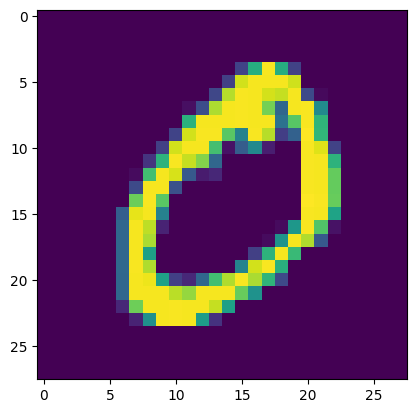

In [155]:
# Show a sample MNIST digit.
plt.imshow(x_train[1])
plt.show()

# 3. Convolutional Neural Network (CNN)

## 3.1 Define the model

In [167]:
model = tf.keras.models.Sequential()

# Entry Layer 28x28x1 = Image size
model.add(tf.keras.layers.Input((28,28,1)))

# Adding a 2D convolutional layer because we work with images 
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))  # 20% dropout rate

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))  

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))  

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))  

model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Show the model.
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 3.2 Train the model

In [158]:
# Define the parameters
batch_size = 128
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (x_test, y_test))
        

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6965 - loss: 0.9178 - val_accuracy: 0.9802 - val_loss: 0.0627
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9579 - loss: 0.1447 - val_accuracy: 0.9851 - val_loss: 0.0488
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9695 - loss: 0.1062 - val_accuracy: 0.9887 - val_loss: 0.0377
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9757 - loss: 0.0851 - val_accuracy: 0.9895 - val_loss: 0.0316
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9779 - loss: 0.0738 - val_accuracy: 0.9904 - val_loss: 0.0296
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9801 - loss: 0.0688 - val_accuracy: 0.9919 - val_loss: 0.0252
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9837 - loss: 0.0577 - val_accuracy: 0.9904 - val_loss: 0.0299
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9840 - loss: 0.0545 - val_accu

## 3.3 Metrics

In [159]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: ",test_accuracy)
print("Test loss: ",test_loss)
# Save metrics
metrics = history.history

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0332
Test accuracy:  0.9926000237464905
Test loss:  0.024531573057174683


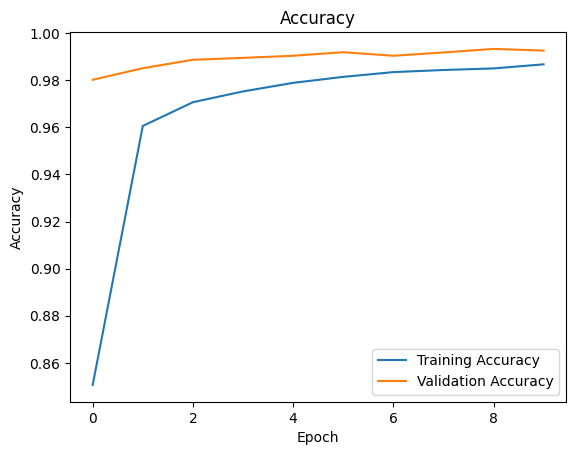

In [160]:
# Plot accuracy
x = np.arange(0, epochs, 1)
train_accuracy = metrics['accuracy']
val_accuracy = metrics['val_accuracy']
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy, label='Training Accuracy')
plt.plot(x, val_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()

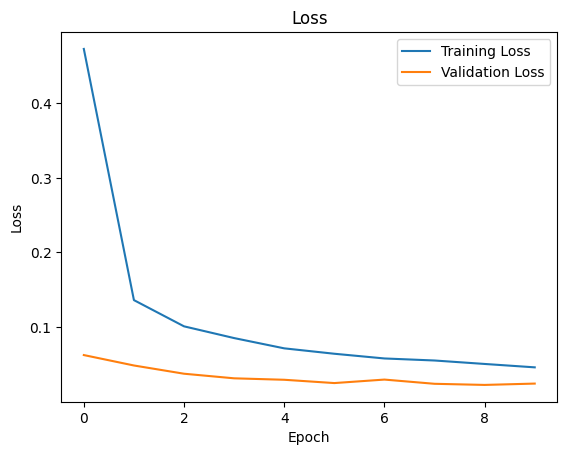

In [161]:
# Plot loss.
training_loss = metrics['loss']
val_loss = metrics['val_loss']
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss, label='Training Loss')
plt.plot(x, val_loss, label='Validation Loss')
plt.legend()
plt.show()

## 3.4 Predictions

### 3.4.1 Plot some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


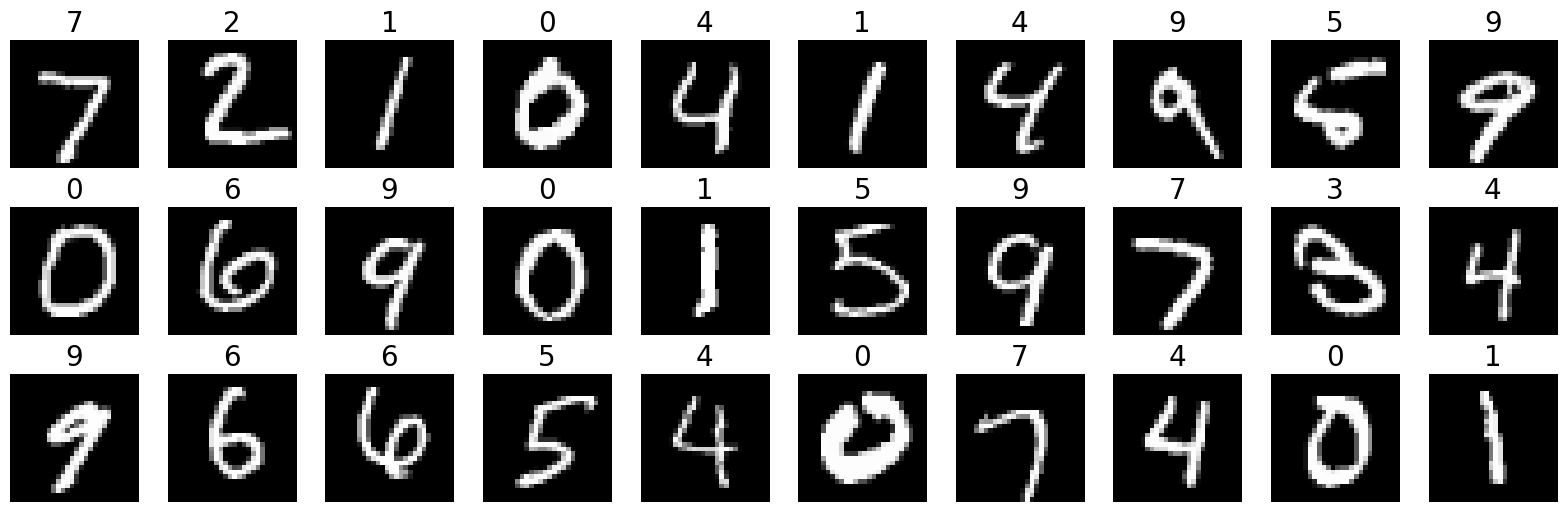

In [162]:
# Make a prediction with the trained model
predictions = model.predict(x_test)
y_pred = np.argmax(predictions,axis=1)
# Revert one hot encoding
true_labels = np.argmax(y_test, axis=1)
# Plot
num_images = 30
columns = 10
rows = num_images // columns  # Calculate number of rows dynamically
plt.figure(figsize=(columns * 2, rows * 2))

for i in range(num_images):
    plt.subplot(rows, columns, i + 1)  # Create a grid
    plt.imshow(x_test[i].squeeze(), cmap="gray")  # Display image
    plt.axis("off")  # Hide axis
    
    if y_pred[i] == true_labels[i]:
        title_color = "black"  # Correct prediction in black
        title_text = f"{y_pred[i]}"  # Just the label
    else:
        title_color = "red"  # Incorrect prediction in red
        title_text = f"{y_pred[i]} ({true_labels[i]})"  # Show wrong label (correct label)
    plt.title(title_text, color=title_color, fontsize=20)
# Add space between rows
plt.subplots_adjust(hspace=0.3)
plt.show()

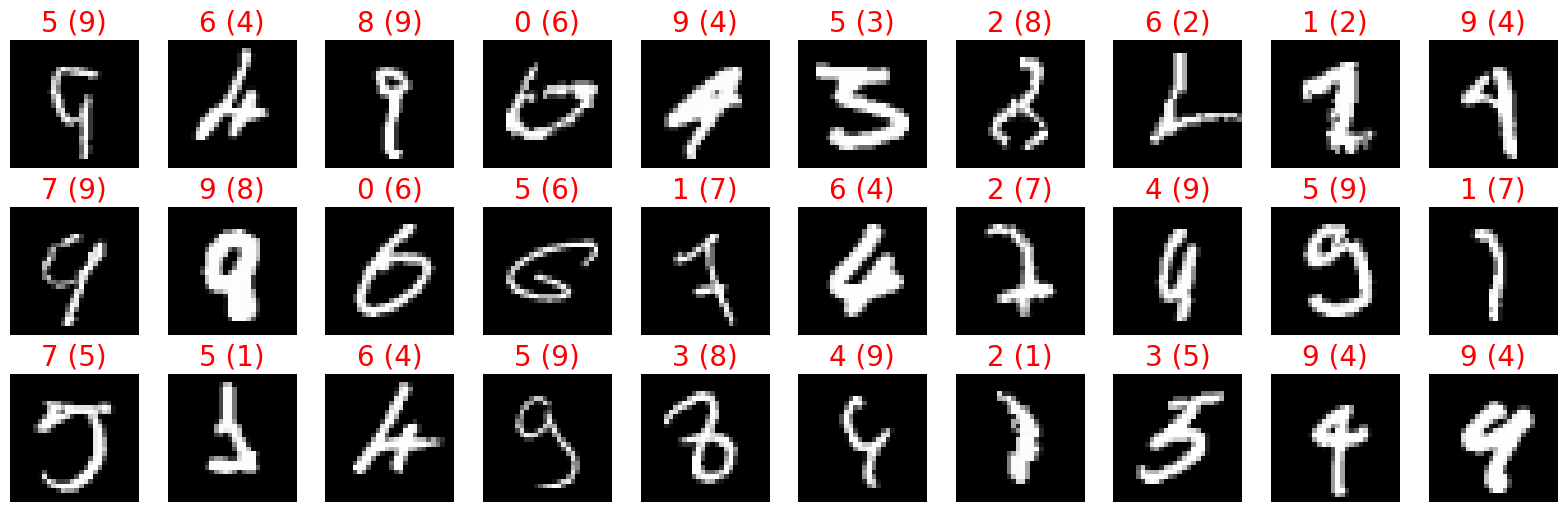

In [163]:
# Let's display some errors
errors = [i for i in range(len(x_test)) if y_pred[i]!=true_labels[i]]
# Number of error we want to display
num_errors = 30
# Plot
if num_errors < len(errors):
    num_display = num_errors
else: 
    num_display = len(errors)
if num_display >= 10:
    rows = num_display//10
    columns = 10
else:
    rows = 1
    columns = len(errors)
plt.figure(figsize=(columns * 2, rows * 2))

for i in range(rows*columns):
    plt.subplot(rows, columns, i + 1)  # Create a grid
    plt.imshow(x_test[errors[i]].squeeze(), cmap="gray")  # Display image
    plt.axis("off")  # Hide axis
    title_color = "red"  # Incorrect prediction in red
    title_text = f"{y_pred[errors[i]]} ({true_labels[errors[i]]})"  # Show wrong label (correct label)
    plt.title(title_text, color=title_color, fontsize=20)
# Add space between rows
plt.subplots_adjust(hspace=0.3)
plt.show()

### 3.4.2 Confusion Matrix

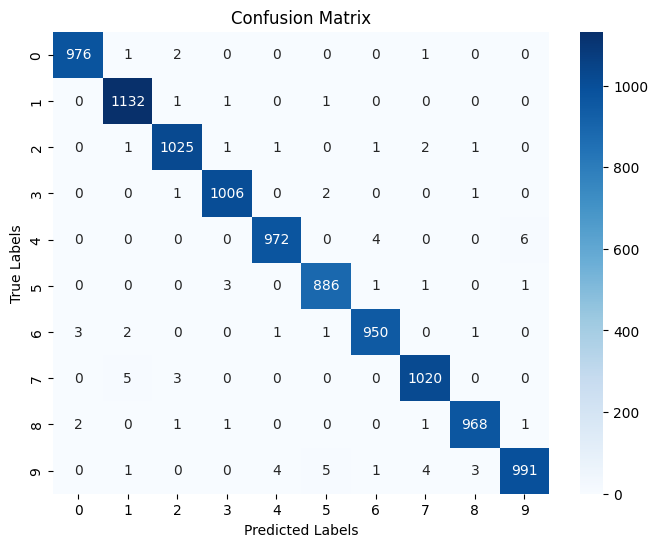

In [164]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, y_pred)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))

# Label the axes and add a title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# 4. Save the model

In [165]:
# Format the test accuracy to 4 decimal places
formatted_accuracy = f"{test_accuracy:.4f}"
# Save the model to a file (in HDF5 format)
model.save(f'model_{formatted_accuracy}.keras')